# Arbeitsblatt 3: Supportvektormaschinen mit Scikit Learn, Random Forests und Boosting

## 1. Klassifikation mit SVMs

In unserer letzten Übung befassen wir uns mit dem Python-Paket *Scikit Learn*, mit dem sich die meisten Standard-Lernmaschinen auf sehr bequeme (und trotzdem performante) Weise realisieren lassen. Schauen Sie sich zunächst das einführende Tutorium unter `http://scikit-learn.org/stable/tutorial/basic/tutorial.html` an, um die grundsätzliche Syntax zu erlernen.

Aufgaben:


a) Laden Sie, wie im Tutorium beschrieben, den berühmten MNIST-Datensatz mit eingescannten handgeschriebenen Ziffern mit der Funktion `digits = load_digits()`. Grundlegende Informationen zum Datensatz erhalten Sie durch Ausgabe des Attributes `digits.DESCR`. Die Merkmalsvektoren (hier Bilder) sind die Zeilen der Designmatrix `digits.data`, die zugehörigen Labels stehen in dem Vektor `digits.target`. Wie in Arbeitsblatt 1 gelernt, finden Sie heraus, wieviele und welche Labels und wieviele Daten es gibt, und welche Dimension diese haben. Stellen Sie eine Zufallsauswahl von 10 Bildern (zusammen mit der Klassenzugehörigkeit) in Ihrem Notebook dar.

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

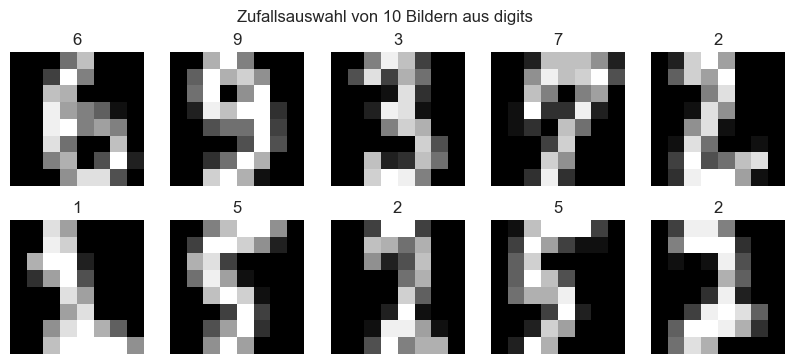

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

digits = load_digits()
print(digits.DESCR)
X = digits.data
y = digits.target
print("Datenform:", X.shape)
print("Einzigartige Labels:", np.unique(y))
print("Anzahl Beispiele:", X.shape[0])

rng = np.random.RandomState(42)
indices = rng.choice(np.arange(X.shape[0]), size=10, replace=False)
plt.figure(figsize=(10, 4))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[idx], cmap='gray')
    plt.title(f"{y[idx]}")
    plt.axis('off')
plt.suptitle('Zufallsauswahl von 10 Bildern aus digits')
plt.show()

b) Teilen Sie den Datensatz zufällig in einen nichtüberlappenden Trainings- und Testdatensatz auf, so dass ein Viertel der Daten zu Testdaten werden. Dies geschieht am Einfachsten mit der Funktion `sklearn.model_selection.train_test_split()`. Trainieren Sie einen Supportvektor-Klassifikator (Standard in *Scikit Learn* ist eine 1-Norm Soft Margin SVM, bei Mehrklassenproblemen wird automatisch ein Satz von one-vs.-one-Klassifikatoren erstellt) mit einem RBF-Kern mit $\gamma = 0.015$ und einem Parameter $C = 1.0$. Bestimmen Sie den Anteil korrekt klassifizierter Beispiele (Korrektklassifikationsrate, **Treffergenauigkeit**, engl. *Accuracy*) im Trainings- und Testdatensatz mithilfe der Funktion `SVC.score()`. **Underfitting** liegt vor, wenn Ihr Klassifikator auf den Trainingsdatensatz eine Treffergenauigkeit von deutlich unter 100% erzielt, bei **Overfitting** liegt die Treffergenauigkeit auf dem Testdatensatz deutlich unter der auf dem Trainingsdatensatz. Welcher Fall liegt hier vor? Probieren Sie alternativ die SVM-Parameter $\gamma = 0.001$ und $C = 100$ und vergleichen Sie. Wiederholen Sie das Experiment für einen anderen Zufallssplit in Trainings- und Testdatensatz. Wie stark hängt Ihr Ergebnis von der zufälligen Teilung in Trainings- und Testdatensatz ab?


In [4]:
def run_svm_experiment(seed):
    print(f"\n--- Experiment mit random_state={seed} ---")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=seed, stratify=y
    )
    print(f"Train-/Test-Größe: {X_train.shape[0]} / {X_test.shape[0]}")

    configs = [
        (dict(gamma=0.015, C=1.0), 'gamma=0.015, C=1.0'),
        (dict(gamma=0.001, C=100.0), 'gamma=0.001, C=100')
    ]

    for params, name in configs:
        clf = SVC(kernel='rbf', gamma=params['gamma'], C=params['C'])
        clf.fit(X_train, y_train)
        train_acc = clf.score(X_train, y_train)
        test_acc = clf.score(X_test, y_test)
        print(f"{name}: Train-Accuracy={train_acc:.4f}, Test-Accuracy={test_acc:.4f}")


run_svm_experiment(0)
run_svm_experiment(1)

# Overfitting, da bei gamma=0.015, C=1.0 => Test-Accuracy=0.5978

# gamma: Steuert die Breite der RBF-Gaußfunktion im Kern. Kernel: K(x,x') = exp(-gamma * ||x-x'||^2). Klein gamma → breitere Gausskurve → glattere Entscheidungsfläche (mehr Bias, weniger Varianz). Groß gamma → schmalere Gausskurve → sehr lokale, komplexe Grenzen (weniger Bias, mehr Varianz / Overfitting). Oft gilt gamma = 1/(2*sigma^2).
# C: Strafparameter für Fehlklassifikationen (Soft-Margin). Großes C → hohe Strafe für Fehler → Modell versucht Trainingsfehler zu minimieren (geringere Regularisierung, Risiko Overfitting). Kleines C → mehr Regularisierung, größere Margin, evtl. mehr Trainingsfehler (Underfitting).


--- Experiment mit random_state=0 ---
Train-/Test-Größe: 1347 / 450
gamma=0.015, C=1.0: Train-Accuracy=1.0000, Test-Accuracy=0.5978
gamma=0.001, C=100: Train-Accuracy=1.0000, Test-Accuracy=0.9933

--- Experiment mit random_state=1 ---
Train-/Test-Größe: 1347 / 450
gamma=0.015, C=1.0: Train-Accuracy=1.0000, Test-Accuracy=0.6311
gamma=0.001, C=100: Train-Accuracy=1.0000, Test-Accuracy=0.9844


## 2. Kreuzvalidierung und Modellselektion

Bei der Methode der Kreuzvalidierung wird der zufällige Split in Trainings- und Testdatensatz aus Aufgabe 1 mehrere Male wiederholt und der Durchschnitt über mehrere Splits berechnet, um eine genauere Schätzung der wirklichen Treffergenauigkeit zu erhalten. *Scikit Learn* stellt dafür bereits eine vordefinierte Methode zur Verfügung: `sklearn.model_selection`. Die Methode verwendet die Iteratorsyntax von Python, Beispiele zur Verwendung finden Sie in der Dokumentation dieser Methode. `ShuffleSplit()` erzeugt einen Satz von permutierten Indizes von Trainings- und Testdaten.

Aufgaben:

a) Erzeugen Sie zunächst 3 Sätze und trainieren Sie für jeden Satz eine SVM mit $\gamma = 0.001$ und $C = 1$ und geben Sie jeweils die Treffergenauigkeit für Trainings- und Testdatensatz aus. Die Ergebnisse sollten ähnlich wie in Aufgabe 1b aussehen.

In [5]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
import matplotlib.pyplot as plt

for seed in (0, 1, 2):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=seed, stratify=y
    )
    clf = SVC(kernel='rbf', gamma=0.001, C=1.0)
    clf.fit(X_train, y_train)
    print(f"seed={seed}: Train-Acc={clf.score(X_train, y_train):.4f}, Test-Acc={clf.score(X_test, y_test):.4f}")


seed=0: Train-Acc=0.9978, Test-Acc=0.9911
seed=1: Train-Acc=0.9985, Test-Acc=0.9911
seed=2: Train-Acc=0.9985, Test-Acc=0.9911


b) Statt wie in 2a von Hand vorzugehen gibt es in Scikit Learn die bereits vordefinierte Methode sklearn.model_selection.cross_val_score(). Wiederholen Sie Ihr Experiment aus Aufgabe 2a mit 10 Zufallssplits und geben Sie jeweils die Treffergenauigkeit auf dem Testdatensatz aus. Berechnen Sie die mittlere Treffergenauigkeit (die Kreuzvalidierungsgenauigkeit) und die Standardabweichung des Mittelwerts.

In [6]:
ss = ShuffleSplit(n_splits=10, test_size=0.25, random_state=42)
scores = cross_val_score(SVC(kernel='rbf', gamma=0.001, C=1.0), X, y, cv=ss, scoring='accuracy', n_jobs=-1)
print('Einzelne Test-Accs:', np.round(scores, 4))
print('Mittelwert:', np.round(scores.mean(), 4), 'Std:', np.round(scores.std(), 4))

Einzelne Test-Accs: [0.9889 0.9956 0.9867 0.9911 0.9889 0.9867 0.9933 0.9867 0.9889 0.9911]
Mittelwert: 0.9898 Std: 0.0028


c) Mithilfe der Kreuzvalidierungsgenauigkeit können die optimalen - und -Parameter der SVM automatisch gefunden werden. Dieser Vorgang heißt Modellselektion. Man führt zu diesem Zweck eine Gittersuche durch: zunächst wird ein Satz von Werten für und festgelegt. Für alle Wertepaare wird die Kreuzvalidierungsgenauigkeit bestimmt und dann die Parameter gewählt, die die höchste Treffergenauigkeit erzielen. Finden Sie auf diese Weise für den besten Gammawert aus einem Satz von 10 logarithmisch skalierten Gammawerten, erzeugt mit

Verwenden Sie dazu eine Trainings- und Testdatensatzgröße von 500 und 5 Splits (s. Dokumentation von ShuffleSplit) und speichern Sie die Treffergenauigkeit auf dem Trainings- und Testdatensatz für jeden Gammawert und Split. Plotten Sie die Treffergenauigkeitskurve für jeden Split mit dem Gammawert als Abszisse in einem gemeinsamen Diagramm, jeweils für die Trainings- und die Testdaten. Diese Kurven werden Validierungskurven genannt (s.u.). Für welche Gammawerte erhalten Sie Underfitting, für welche Overfitting? Wo liegt der optimale Gammawert?

![./validierungskurve.png](./validierungskurve.png)


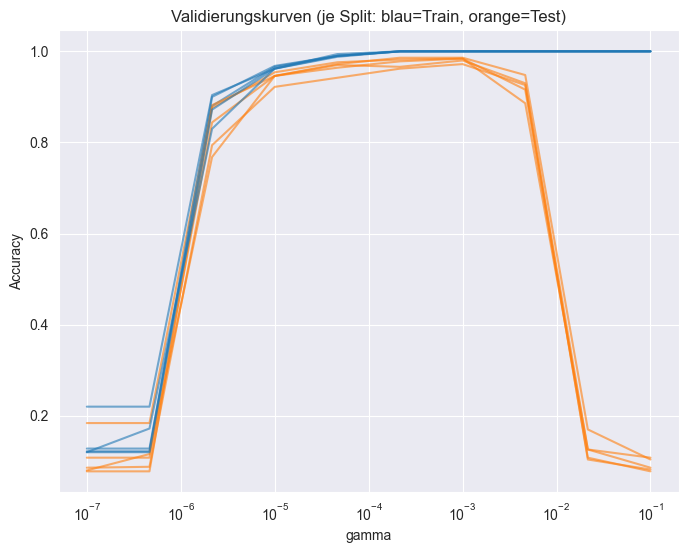

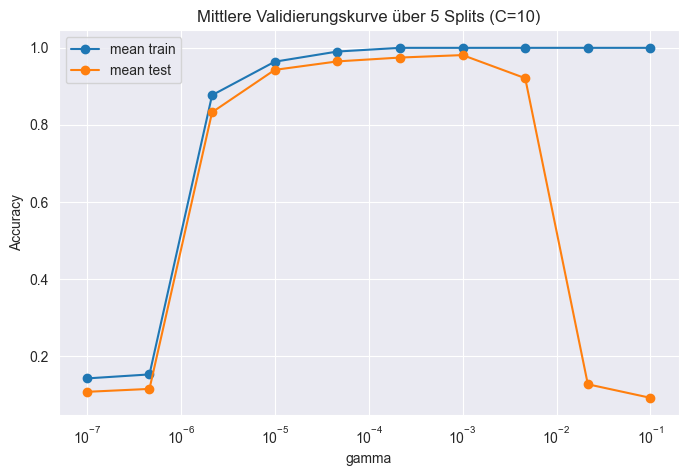

Optimaler gamma (nach mittlerer Test-Accuracy): 0.001 mit Accuracy 0.9812


In [7]:
from sklearn.model_selection import ShuffleSplit

gammas = np.logspace(-7, -1, 10)
ss2 = ShuffleSplit(n_splits=5, train_size=500, test_size=500, random_state=0)
train_scores = np.zeros((5, len(gammas)))
test_scores = np.zeros((5, len(gammas)))

for i, (train_idx, test_idx) in enumerate(ss2.split(X, y)):
    X_tr = X[train_idx]
    y_tr = y[train_idx]
    X_te = X[test_idx]
    y_te = y[test_idx]
    for j, g in enumerate(gammas):
        clf = SVC(kernel='rbf', C=10.0, gamma=g)
        clf.fit(X_tr, y_tr)
        train_scores[i, j] = clf.score(X_tr, y_tr)
        test_scores[i, j] = clf.score(X_te, y_te)

# Plot Validierungskurven
plt.figure(figsize=(8, 6))
for i in range(train_scores.shape[0]):
    plt.semilogx(gammas, train_scores[i], color='C0', alpha=0.6)
    plt.semilogx(gammas, test_scores[i], color='C1', alpha=0.6)
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.title('Validierungskurven (je Split: blau=Train, orange=Test)')
plt.grid(True)
plt.show()

mean_train = train_scores.mean(axis=0)
mean_test = test_scores.mean(axis=0)
plt.figure(figsize=(8, 5))
plt.semilogx(gammas, mean_train, '-o', label='mean train')
plt.semilogx(gammas, mean_test, '-o', label='mean test')
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.title('Mittlere Validierungskurve über 5 Splits (C=10)')
plt.legend()
plt.grid(True)
plt.show()

best_idx = np.argmax(mean_test)
print(f"Optimaler gamma (nach mittlerer Test-Accuracy): {gammas[best_idx]} mit Accuracy {mean_test[best_idx]:.4f}")


d) Die Gittersuche lässt sich ebenfalls automatisieren mit sklearn.model_selection. GridSearchCV(). Wir erzeugen dazu ein Gitter aus Wertepaaren für und

mit dem Dictionary

```python
svc_params = {
  'C': np.logspace(-1, 2, 4),
  'gamma': np.logspace(-4, 0, 5)
}
```

Dieses Gitter kann direkt an GridSearchCV() als Argument param_grid übergeben werden. Da diese Prozedur sehr zeitaufwendig ist, verkleinern wie den Datensatz auf die ersten 500 Beispiele. Führen Sie für diesen verkleinerten Datensatz eine Gittersuche mithilfe von GridSearchCV() und jeweils 3 Splits (Parameter cv) durch. Den besten Parametersatz erhalten Sie mit GridSearchCV().best_params_, die höchste Treffergenauigkeit mit GridSearchCV().best_score_. Ausführliche Informationen zu jedem Parameterwertepaar stehen in dem Dictionary GridSearchCV().cv_results_. Nach der Gittersuche führt GridSearchCV() noch ein Training auf dem gesamten Datensatz mit den besten Parametern durch, so dass die resultierende Maschine sofort eingesetzt werden kann. Testen Sie diese Maschine auf den übriggebliebenen Daten.


In [8]:
X_small = X[:500]
y_small = y[:500]

svc = SVC()
# Parametergitter für GridSearch (wie in Aufgabenbeschreibung)
svc_params = {
    'C': np.logspace(-1, 2, 4),
    'gamma': np.logspace(-4, 0, 5),
}
param_grid = svc_params
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(svc, param_grid=param_grid, cv=3, n_jobs=-1)
gs.fit(X_small, y_small)
#print(gs.cv_results_)
print('Beste Parameter:', gs.best_params_)
print('Beste CV-Accuracy auf Trainingssubset:', gs.best_score_)

# Test auf verbleibenden Daten
clf_best = gs.best_estimator_

test_acc = clf_best.score(X[500:], y[500:])
print('Accuracy auf Restdaten:', test_acc)

{'mean_fit_time': array([0.00799902, 0.00852394, 0.0135421 , 0.01406193, 0.02403792,
       0.00734647, 0.01033187, 0.01533039, 0.01399859, 0.02451992,
       0.00734679, 0.01399875, 0.01533206, 0.01566744, 0.02733231,
       0.00699743, 0.00999975, 0.01735218, 0.01702404, 0.02302496]), 'std_fit_time': array([1.32507737e-06, 4.10473758e-04, 1.43304913e-03, 4.01503730e-04,
       2.13544032e-06, 4.89015989e-04, 1.24814856e-03, 9.42797310e-04,
       8.15173085e-04, 1.41377390e-03, 8.52222208e-04, 4.24317631e-03,
       1.24850942e-03, 4.70696366e-04, 2.49393928e-03, 8.17412720e-04,
       1.94667955e-07, 4.58542561e-04, 2.46470539e-03, 1.64866562e-03]), 'mean_score_time': array([0.00666897, 0.00583943, 0.00869155, 0.00899458, 0.01266646,
       0.00866612, 0.00666499, 0.00850749, 0.00885391, 0.01333292,
       0.00584054, 0.00733511, 0.00966891, 0.0089999 , 0.01269786,
       0.00500003, 0.00700021, 0.00868408, 0.00801245, 0.01034617]), 'std_score_time': array([4.72831485e-04, 2.2764919


## 3. Klassifikation mit Random Forests und Boosting

a) Wiederholen Sie Aufgabe 1 b mit einem Random Forest. Teilen Sie dazu den Datensatz wieder in einen Trainings- und Testdatensatz. Bestimmen Sie den Fehler auf den Testdaten und vergleichen Sie ihn mit dem ”out of bag”-Fehler.

In [9]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

seed = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed, stratify=y)
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=seed, n_jobs=-1)
rf.fit(X_train, y_train)
rf_train_acc = rf.score(X_train, y_train)
rf_test_acc = rf.score(X_test, y_test)
rf_oob_err = 1.0 - rf.oob_score_
print(f"RandomForest: Train-Acc={rf_train_acc:.4f}, Test-Acc={rf_test_acc:.4f}, OOB-Error={rf_oob_err:.4f}")
print('\nConfusion matrix (Test):')
print(confusion_matrix(y_test, rf.predict(X_test)))


RandomForest: Train-Acc=1.0000, Test-Acc=0.9822, OOB-Error=0.0290

Confusion matrix (Test):
[[44  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  1 43  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  1  1  0]
 [ 0  0  0  0 44  0  0  0  1  0]
 [ 0  0  0  0  0 45  0  0  1  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  1  0  0  0  0  0  0 42  0]
 [ 0  0  0  1  0  0  0  0  0 44]]


b) Wiederholen sie Aufgabe 1 b mit einem Boosting-Verfahren. Sie können dazu entweder die Implementierung von sklearn verwenden oder Sie installieren xgboost (https://github.com/dmlc/xgboost) oder catboost (https://catboost.ai/docs/).

In [10]:
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=seed)
ada.fit(X_train, y_train)
ada_train_acc = ada.score(X_train, y_train)
ada_test_acc = ada.score(X_test, y_test)
print(f"AdaBoost (stumps): Train-Acc={ada_train_acc:.4f}, Test-Acc={ada_test_acc:.4f}")
print('Confusion matrix (AdaBoost, Test):')
print(confusion_matrix(y_test, ada.predict(X_test)))

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=seed)
gb.fit(X_train, y_train)
gb_train_acc = gb.score(X_train, y_train)
gb_test_acc = gb.score(X_test, y_test)
print(f"GradientBoosting: Train-Acc={gb_train_acc:.4f}, Test-Acc={gb_test_acc:.4f}")
print('Confusion matrix (GradientBoosting, Test):')
print(confusion_matrix(y_test, gb.predict(X_test)))

print('\nClassification report (RandomForest):')
print(classification_report(y_test, rf.predict(X_test)))


AdaBoost (stumps): Train-Acc=0.8307, Test-Acc=0.8244
Confusion matrix (AdaBoost, Test):
[[44  0  0  0  1  0  0  0  0  0]
 [ 0 37  0  2  0  0  0  1  1  5]
 [ 0  1 31  3  0  0  0  0  5  4]
 [ 0  0  0 41  0  0  0  0  2  3]
 [ 1  9  0  0 22  0  4  8  1  0]
 [ 1  3  0  0  0 39  0  0  1  2]
 [ 1  3  1  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 40  3  2]
 [ 0  2  2  0  0  0  0  0 37  2]
 [ 0  0  0  2  0  1  0  1  1 40]]
GradientBoosting: Train-Acc=1.0000, Test-Acc=0.9644
Confusion matrix (GradientBoosting, Test):
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  1  0  0  0  0  1  1]
 [ 0  1 43  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  2  0]
 [ 0  0  0  0 43  1  0  0  1  0]
 [ 0  0  0  0  0 45  0  0  0  1]
 [ 0  2  0  0  0  0 42  0  1  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  1  0  0  0  0  0  0 42  0]
 [ 0  0  0  2  0  0  0  0  1 42]]

Classification report (RandomForest):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
       

c) Optional: Finden Sie die optimalen Hyperparameter der Algorithmen mit der in 2 d beschriebenen Gittersuche.

In [11]:
X_small = X[:500]
y_small = y[:500]
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10]
}
rf_base = RandomForestClassifier(random_state=0, n_jobs=-1)
gs_rf = GridSearchCV(rf_base, param_grid=param_grid_rf, cv=3, n_jobs=-1)
gs_rf.fit(X_small, y_small)
print('Beste RF-Parameter (Subset):', gs_rf.best_params_)
print('Beste CV-Accuracy (Subset):', gs_rf.best_score_)


Beste RF-Parameter (Subset): {'max_depth': None, 'n_estimators': 100}
Beste CV-Accuracy (Subset): 0.895882932929322
